In [1]:
import pandas as pd
import numpy as np
import os
import itertools

In [2]:
bot_path = 'D:/AION_DATA/may_bot/'
user_path = 'D:/AION_DATA/may_user/'

bot_file_list = os.listdir(bot_path)
user_file_list = os.listdir(user_path)

feature_list = [
    'total_cash', #0
    'cash_in_account', #1
    'cash_in_bank', #2
    'cash_in_mail', #3
    'cash_in_vendor', #4
    'evaluated_asset_value', #5
    'item_number', #6
    'total_agency_default_price', #7
    'total_mail_default_price', #8
    'asset_value_in_bank', #9
    'asset_value_in_account_bank', #10
    'account_ratio_cash', #11 터짐
    'bank_ratio_cash', #12
    'mail_ratio_cash', #13
    'vendor_ratio_cash', #14
    'asset_per_item', #15
    'asset_per_cash', #16
    'gap_btw_cash_asset' #17
]

#Parameters
seq_length = 60
num_feature = len(feature_list)


In [3]:
def bot_generator(bot_dir_path, file_list):
    
    bot_list = []
    
    for csv in file_list: #files : 폴더 리스트
        try:
            managed_file = flatten_to_numpy(bot_dir_path, csv) #np들이 들어있는 List return
            bot_list.append(managed_file)
        except Exception as e:
            print("[Error] Failed to Load")
            print(e)
            pass
    
    merged_bots = list(itertools.chain.from_iterable(bot_list))
    merged_bots = np.asarray(merged_bots)

    return merged_bots

def user_generator(user_dir_path, file_list):
    
    user_list = []

    for csv in file_list:
        try:
            managed_file = flatten_to_numpy(user_dir_path, csv)
            user_list.append(managed_file)
        
        except Exception as e:
            print("[Error] Failed to Load")
            print(e)
            pass
        
    merged_user = list(itertools.chain.from_iterable(user_list))
    merged_user = np.asarray(merged_user)

    return merged_user


def flatten_to_numpy(dir_path, file):

    file_path = dir_path + file
    temp = []
    for i in range(0,660):
        temp.append(str(i))

    data = pd.read_csv(file_path, names=temp) #, names=feature_list)
    dataframe = pd.DataFrame(data)
    #print(file_path)
    #print(dataframe.shape)

    bot_dataset = []
    
    #data 개수에 맞춰서 len(dataframe.index)
    for i in range(len(dataframe.index)):        
        daily_data = dataframe.loc[i].tolist()
        np_data = np.array([np.array(daily_data).astype(np.float32).reshape(seq_length,11)])
        bot_dataset.append(np_data[0])

    #list로 리턴    
    return bot_dataset

In [4]:
use_feature = [
    'total_cash', #0
    'cash_in_account', #1
    'cash_in_bank', #2
    'cash_in_mail', #3
    'cash_in_vendor', #4
    'evaluated_asset_value', #5
    'item_number', #6
    'total_agency_default_price', #7
    'total_mail_default_price', #8
    'asset_value_in_bank', #9
    'asset_value_in_account_bank'
]

In [5]:
bots = bot_generator(bot_path, bot_file_list) 
users = user_generator(user_path, user_file_list)

In [7]:
bots.shape

(106275, 60, 11)

In [8]:
users.shape

(66000, 60, 11)

In [40]:
bot_cash_list = []
bot_account_list = []
bot_bank_list = []
bot_mail_list = []
bot_vendor_list = []
bot_eval_list = []
bot_item_list = []
bot_agency_list = []
bot_tmail_list = []
bot_ab_list = []
bot_acb_list = []

In [41]:
for i in range(len(bots)):
    bot = bots[i]
    sample = pd.DataFrame(bot, columns=use_feature)
    s = sample.mean()
    z = s.to_frame(name='bot')
    bot_cash_list.append(s[0])
    bot_account_list.append(s[1])
    bot_bank_list.append(s[2])
    bot_mail_list.append(s[3])
    bot_vendor_list.append(s[4])
    bot_eval_list.append(s[5])
    bot_item_list.append(s[6])
    bot_agency_list.append(s[7])
    bot_tmail_list.append(s[8])
    bot_ab_list.append(s[9])
    bot_acb_list.append(s[10])

In [51]:
usr_cash_list = []
usr_account_list = []
usr_bank_list = []
usr_mail_list = []
usr_vendor_list = []
usr_eval_list = []
usr_item_list = []
usr_agency_list = []
usr_tmail_list = []
usr_ab_list = []
usr_acb_list = []

In [62]:
for i in range(len(users)):
    usr = users[i]
    sample = pd.DataFrame(usr, columns=use_feature)
    s = sample.mean()
    z = s.to_frame(name='user')
    usr_cash_list.append(s[0])
    usr_account_list.append(s[1])
    usr_bank_list.append(s[2])
    usr_mail_list.append(s[3])
    usr_vendor_list.append(s[4])
    usr_eval_list.append(s[5])
    usr_item_list.append(s[6])
    usr_agency_list.append(s[7])
    usr_tmail_list.append(s[8])
    usr_ab_list.append(s[9])
    usr_acb_list.append(s[10])

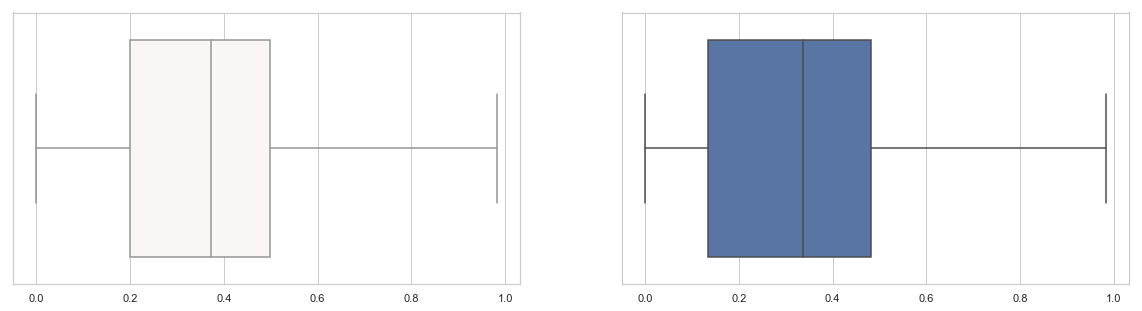

In [69]:
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(20,5))
sns.boxplot(bot_cash_list, ax=axs[0], whis="range", palette="vlag").set_title("")
sns.boxplot(bot_account_list, ax=axs[1],)

sns.set(style='whitegrid')

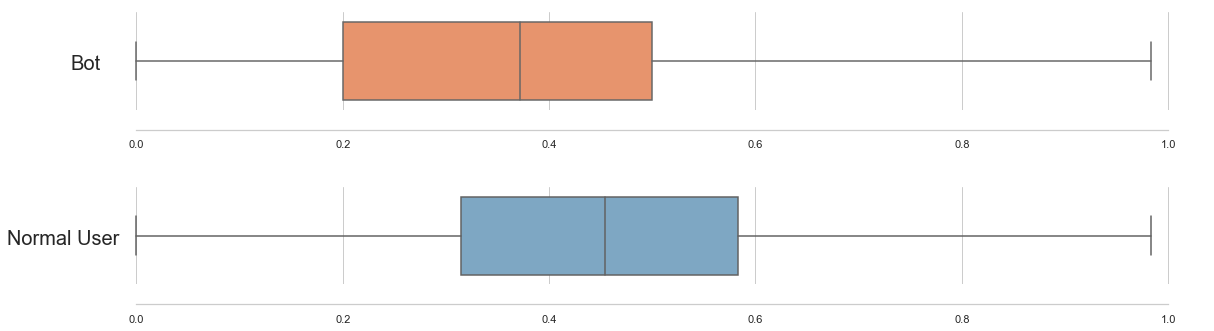

In [147]:
fig, axs = plt.subplots(nrows=2, figsize=(20,5))
plt.subplots_adjust(hspace=0.8, wspace=1)

sns.boxplot(bot_cash_list, ax=axs[0], whis="range", palette="OrRd").set_title("Bot", fontsize=20, x=-0.00001, y=0.35)
sns.boxplot(usr_cash_list, ax=axs[1], whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.35)
#sns.boxplot(usr_cash_list, ax=axs[2], whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.35)
#sns.boxplot(usr_cash_list, ax=axs[3], whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.35)
sns.despine(offset=20, trim=True)
sns.set(style='whitegrid')

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,5))
plt.subplots_adjust(hspace=0.8, wspace=1)

sns.boxplot(bot_cash_list, ax=axs[0], whis="range", palette="OrRd").set_title("Bot", fontsize=20, x=-0.00001, y=0.35)
sns.boxplot(usr_cash_list, ax=axs[1], whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.35)
#sns.boxplot(usr_cash_list, ax=axs[2], whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.35)
#sns.boxplot(usr_cash_list, ax=axs[3], whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.35)
sns.despine(offset=20, trim=True)
sns.set(style='whitegrid')

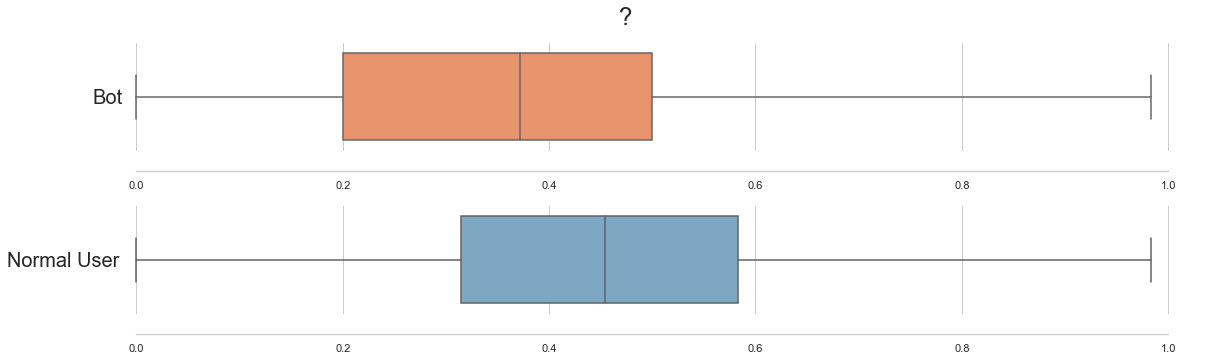

In [204]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('?', fontsize=24)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.boxplot(bot_cash_list, ax=ax1, whis="range", palette="OrRd").set_title("Bot", fontsize=20, x=0.02, y=0.39)
sns.boxplot(usr_cash_list, ax=ax2, whis="range", palette="PuBu").set_title("Normal User", fontsize=20, x=-0.02, y=0.39)

sns.despine(offset=20, trim=True)
plt.subplots_adjust(hspace=0.5, wspace=1)
sns.set(style='whitegrid')

In [17]:
user = users[4]
sample = pd.DataFrame(user, columns=use_feature)
s = sample.mean()
x = s.to_frame(name='user')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF0626A668>,
      dtype=object)

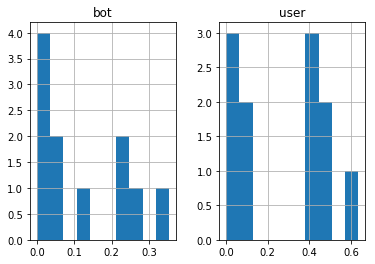

In [22]:
result = pd.concat((z,x), axis=1)
hist = result.hist()
hist

In [23]:
result

,bot,user
total_cash,0.227014,0.426584
cash_in_account,0.223319,0.464367
cash_in_bank,0.030640,0.100000
cash_in_mail,0.000000,0.000000
cash_in_vendor,0.041988,0.635997
evaluated_asset_value,0.260755,0.444643
item_number,0.354268,0.488889
total_agency_default_price,0.000000,0.000000
total_mail_default_price,0.033333,0.000000
asset_value_in_bank,0.133787,0.433333


In [13]:
len(users)

132000

In [64]:
for i in range(10):
    bot = bots[i]
    sample = pd.DataFrame(bot, columns=use_feature)
    s = sample.std()
    z = s.to_frame(name='bot')

    user = users[i]
    sample = pd.DataFrame(user, columns=use_feature)
    s = sample.std()
    x = s.to_frame(name='user')
    
    result = pd.concat((z,x), axis=1)
    
    print(result)

                                  bot      user
total_cash                   0.414605  0.354587
cash_in_account              0.412672  0.415450
cash_in_bank                 0.156414  0.000000
cash_in_mail                 0.000000  0.000000
cash_in_vendor               0.134475  0.219784
evaluated_asset_value        0.399747  0.358989
item_number                  0.294707  0.224649
total_agency_default_price   0.000000  0.000000
total_mail_default_price     0.302532  0.000000
asset_value_in_bank          0.365106  0.415450
asset_value_in_account_bank  0.152525  0.000000
                                  bot      user
total_cash                   0.409544  0.315078
cash_in_account              0.408016  0.278122
cash_in_bank                 0.156414  0.000000
cash_in_mail                 0.000000  0.000000
cash_in_vendor               0.131195  0.385202
evaluated_asset_value        0.395303  0.302691
item_number                  0.289117  0.258688
total_agency_default_price   0.000000  0

In [52]:
bot = bots[4]
sample = pd.DataFrame(bot, columns=use_feature)
s = sample.mean()
z = s.to_frame(name='bot')

user = users[4]
sample = pd.DataFrame(user, columns=use_feature)
s = sample.mean()
x = s.to_frame(name='user')

,bot
total_cash,0.227014
cash_in_account,0.223319
cash_in_bank,0.030640
cash_in_mail,0.000000
cash_in_vendor,0.041988
evaluated_asset_value,0.260755
item_number,0.354268
total_agency_default_price,0.000000
total_mail_default_price,0.033333
asset_value_in_bank,0.133787


In [60]:
pd.concat((z,x), axis=1)

,bot,user
total_cash,0.227014,0.426584
cash_in_account,0.223319,0.464367
cash_in_bank,0.030640,0.100000
cash_in_mail,0.000000,0.000000
cash_in_vendor,0.041988,0.635997
evaluated_asset_value,0.260755,0.444643
item_number,0.354268,0.488889
total_agency_default_price,0.000000,0.000000
total_mail_default_price,0.033333,0.000000
asset_value_in_bank,0.133787,0.433333
